## Import the dependecies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load and Preview the Dataset

In [2]:
# Load togo dataset
df = pd.read_csv("../data/benin-malanville.csv", parse_dates=["Timestamp"])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## 1. Summary Statistics & Missing-Value Report

In [3]:
# Summary statistics
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


In [4]:
# Missing value report
# Count of missing values per column
missing_values = df.isna().sum()

# Total rows in dataset
total_rows = df.shape[0]

# Columns with >5% missing
missing_percent = (missing_values / total_rows) * 100
missing_report = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing %": missing_percent
})

# Filter columns with more than 5% missing
missing_above_5 = missing_report[missing_report["Missing %"] > 5]
missing_report


,Missing Count,Missing %
Timestamp,0,0.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModA,0,0.0
ModB,0,0.0
Tamb,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


## Outlier Detection & Basic Cleaning

### Outlier Detection

In [5]:
# Identify numeric columns
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[cols_to_check]))
outlier_flags = (z_scores > 3).any(axis=1)
print(f"Number of outlier samples flagged: {outlier_flags.sum()}")

Number of outlier samples flagged: 7740


### Basic Cleaning: Impute or Drop Null

In [6]:
# Impute missing numeric columns with median
df_clean = df.copy()
for col in cols_to_check:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

### Export Cleaned Dataset


In [7]:
df_clean.to_csv("../data/benin_clean.csv", index=False)

## Time Series Analysis

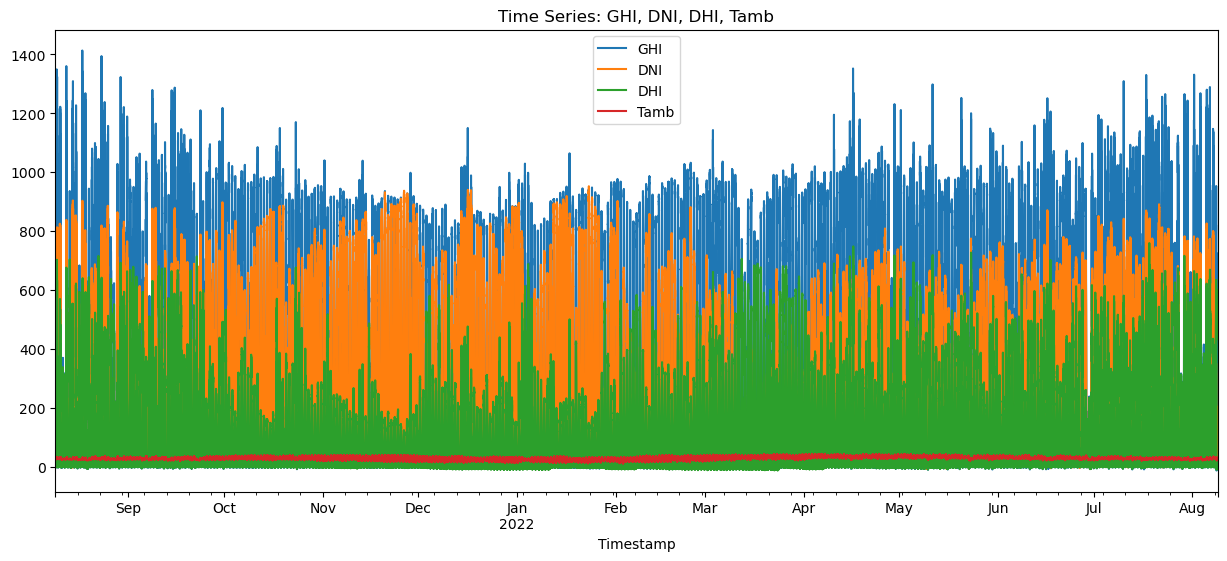

In [8]:
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15,6))
plt.title("Time Series: GHI, DNI, DHI, Tamb")
plt.show()

In [9]:
# to make plots look nicer
sns.set(style="whitegrid")

### Line Chart of Full Time Series

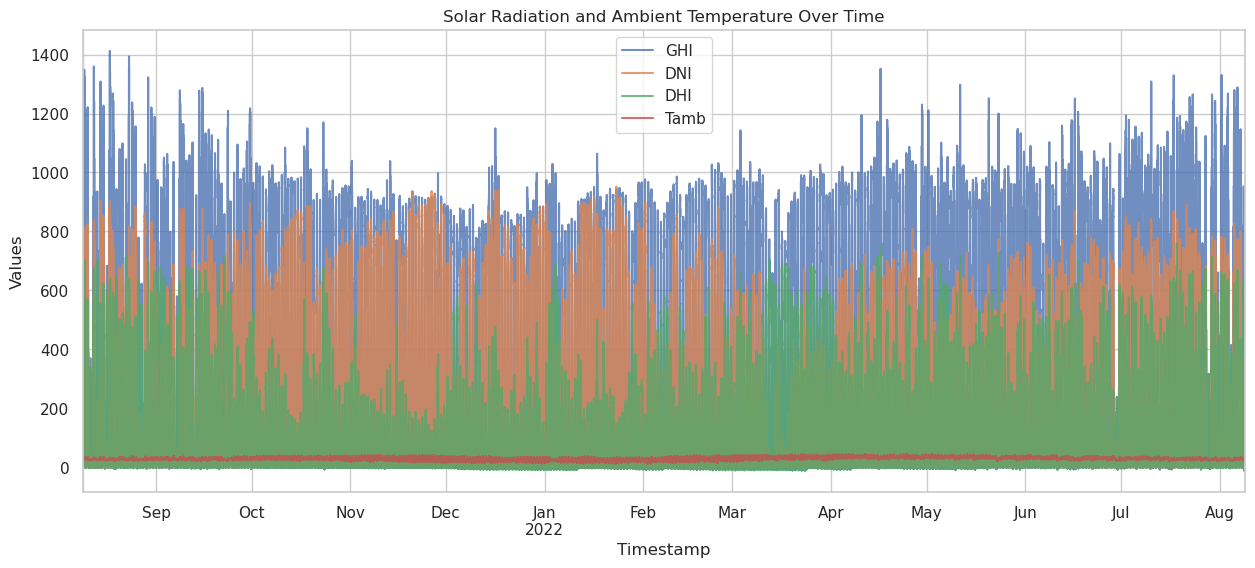

In [10]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 6), alpha=0.8)
plt.title("Solar Radiation and Ambient Temperature Over Time")
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.show()

### Monthly Pattern Overview

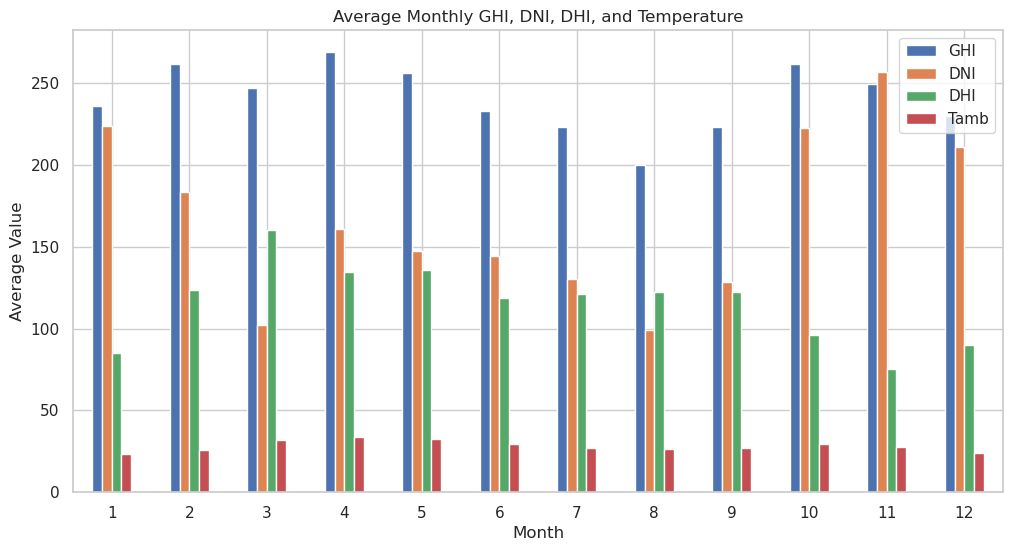

In [11]:
# Add a month column
df_clean['Month'] = df_clean.index.month

# Plot monthly average
monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title("Average Monthly GHI, DNI, DHI, and Temperature")
plt.ylabel("Average Value")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.show()

### Daily Trend Pattern Overview

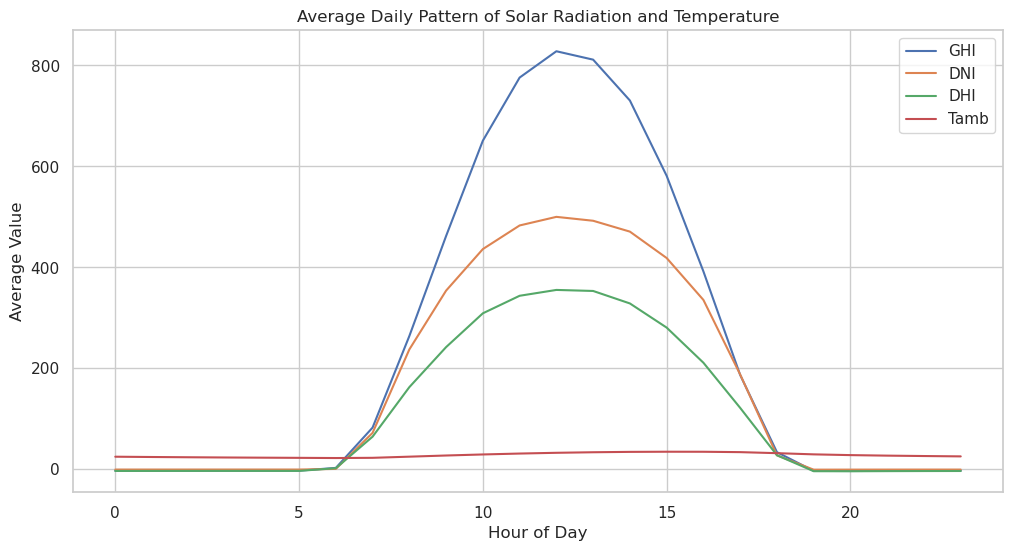

In [12]:
# Add hour column
df_clean['Hour'] = df_clean.index.hour

# Average by hour
hourly_avg = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.plot(figsize=(12,6))
plt.title("Average Daily Pattern of Solar Radiation and Temperature")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

## Cleaning Impact Analysis

In [13]:
# Check if Cleaning column is present and correctly typed
df_clean['Cleaning'] = df_clean['Cleaning'].fillna(0).astype(int)

# Group by Cleaning flag
mod_avg = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

mod_avg.rename(columns={0: 'No Cleaning', 1: 'After Cleaning'}, inplace=True)
mod_avg


,Cleaning,ModA,ModB
0,0,236.524253,228.816071
1,1,307.229278,301.972165


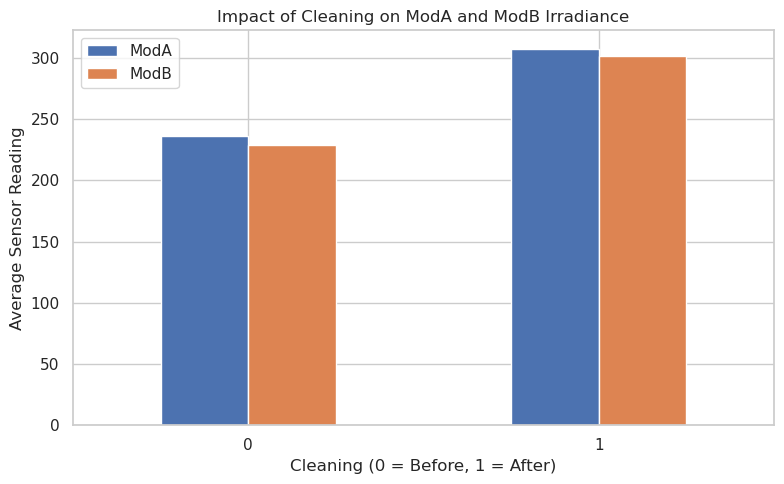

In [14]:

mod_avg.plot(
    kind='bar',
    x='Cleaning',
    figsize=(8, 5),
    title='Impact of Cleaning on ModA and ModB Irradiance',
    legend=True,
    rot=0
)

plt.xlabel("Cleaning (0 = Before, 1 = After)")
plt.ylabel("Average Sensor Reading")
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation & Relationship Analysis

### Heatmap of correlations

<Axes: >

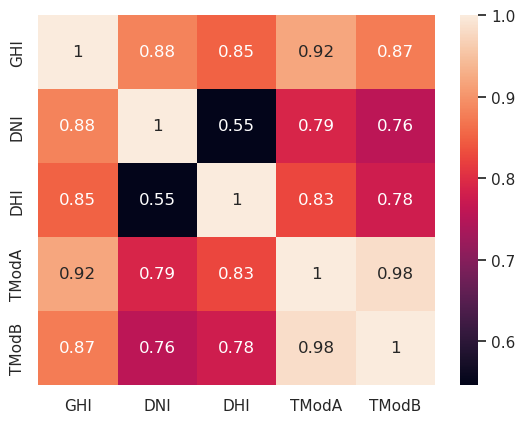

In [15]:
# Heatmap
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True)

### Scatter plots

<Axes: xlabel='WS', ylabel='GHI'>

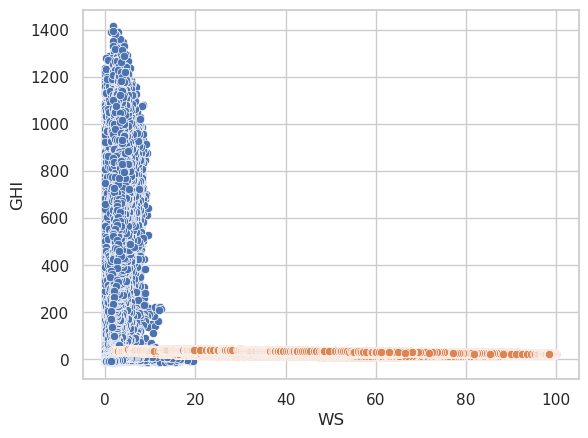

In [16]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')

<Axes: xlabel='WSgust', ylabel='GHI'>

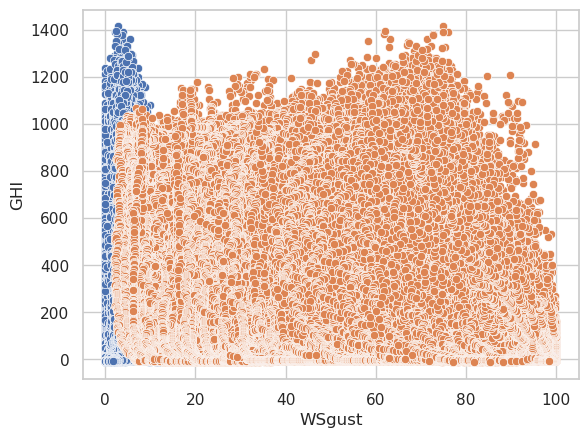

In [17]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='GHI')

<Axes: xlabel='WD', ylabel='GHI'>

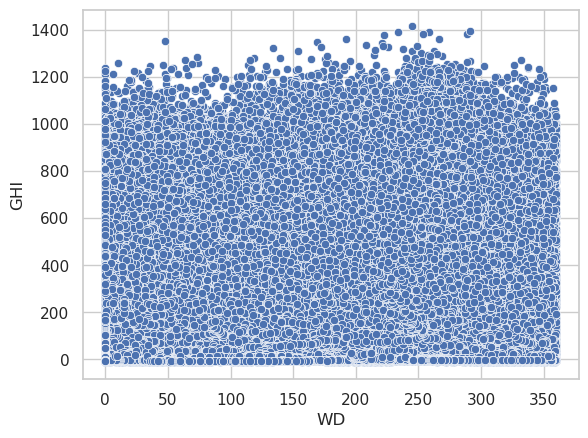

In [18]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WD', y='GHI')

## Wind & Distribution Analysis

array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'WS'}>]],
      dtype=object)

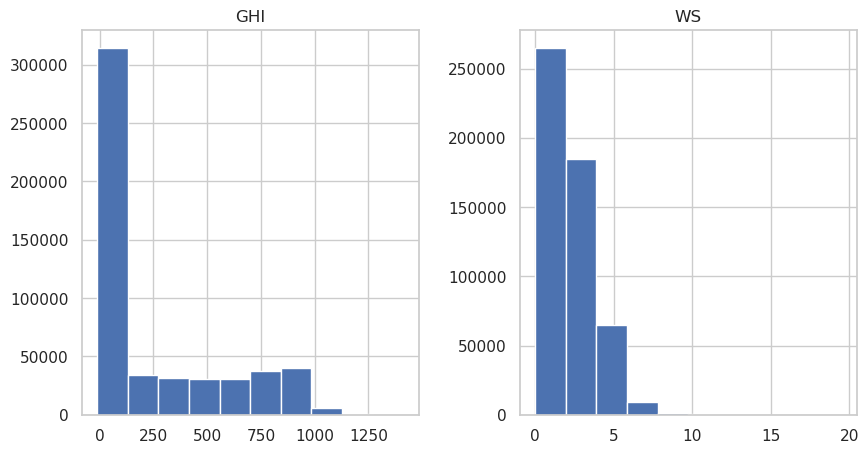

In [19]:
# Histogram of GHI and WS
df_clean[['GHI', 'WS']].hist(figsize=(10,5))

## Temperature Analysis

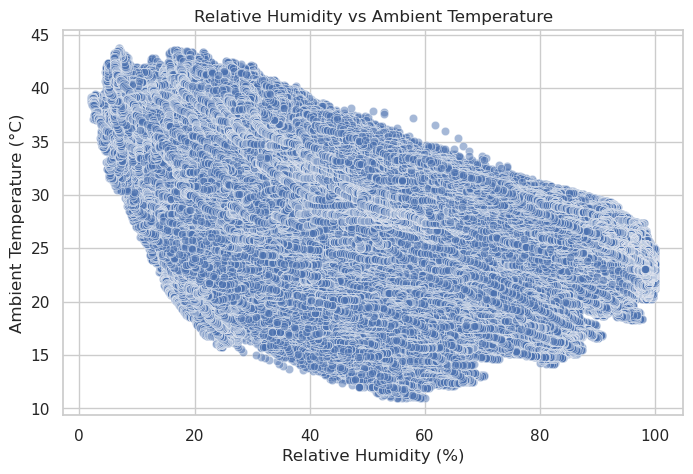

In [20]:
# Scatter Plot: RH vs Tamb
# This shows whether higher humidity correlates with cooler or warmer air temperatures.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.grid(True)
plt.show()

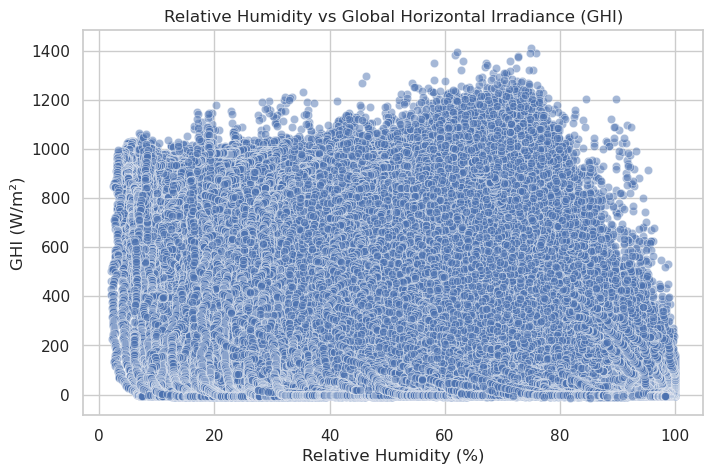

In [21]:
# Scatter Plot: RH vs GHI
# This shows if humidity influences solar irradiance. High RH could mean more cloud cover, reducing GHI.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.5)
plt.title("Relative Humidity vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.show()


In [22]:
# Correlation Coefficients
#This gives a quick numerical insight into strength of relationships.

# Correlation values
print("Correlation between RH and Tamb:", df_clean['RH'].corr(df_clean['Tamb']))
print("Correlation between RH and GHI:", df_clean['RH'].corr(df_clean['GHI']))

Correlation between RH and Tamb: -0.41484177497995606
Correlation between RH and GHI: -0.3600286885499274


A negative correlation between RH and GHI suggests high humidity blocks sunlight (common in cloud-prone regions).

A negative correlation between RH and Tamb suggests cooler temperatures in high-humidity areas.

## Bubble Chart

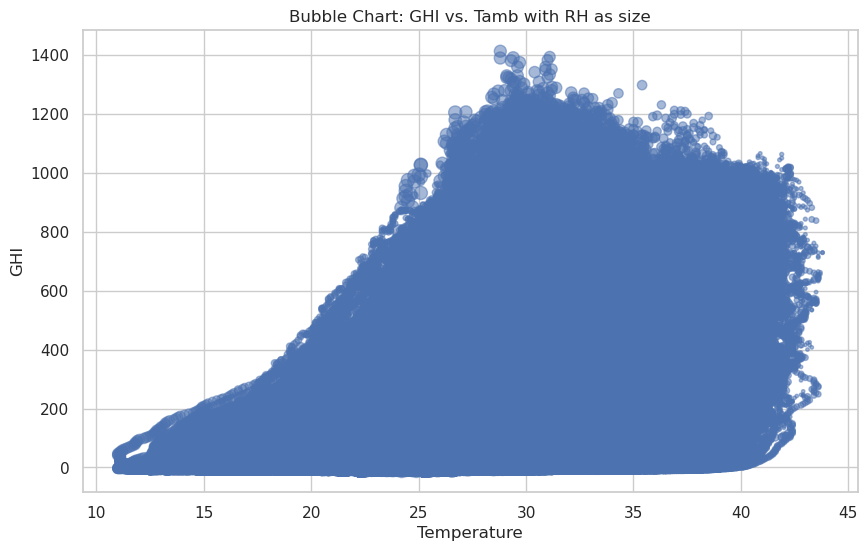

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('GHI')
plt.title('Bubble Chart: GHI vs. Tamb with RH as size')
plt.show()